# BollingerBands

In [1]:
!pip install tabulate --upgrade
!pip install numpy --upgrade
!pip install pandas --upgrade
!pip install matplotlib==3.1.1
!pip install yfinance --upgrade
!pip install ta
!pip install tabulate
!pip install pandas_datareader 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 10.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel 

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import ta

In [3]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = [14,8]

[*********************100%***********************]  1 of 1 completed


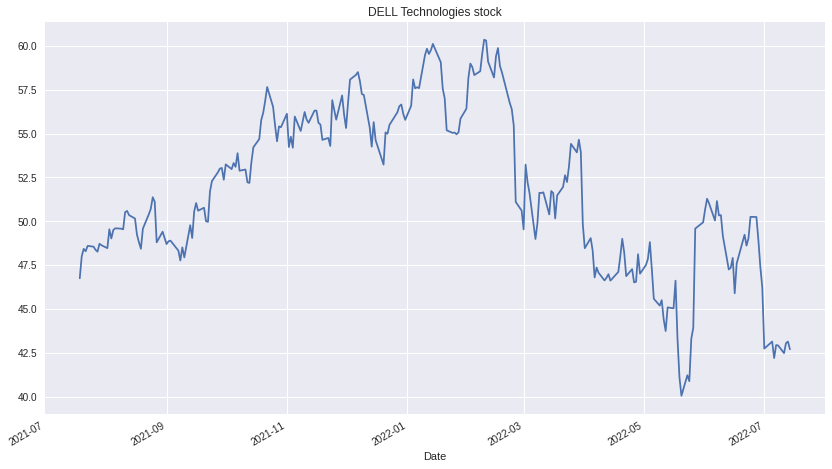

In [4]:
df = yf.download("DELL", start="2021-07-19", end="2022-07-15")

df["Adj Close"].plot(title = "DELL Technologies stock")

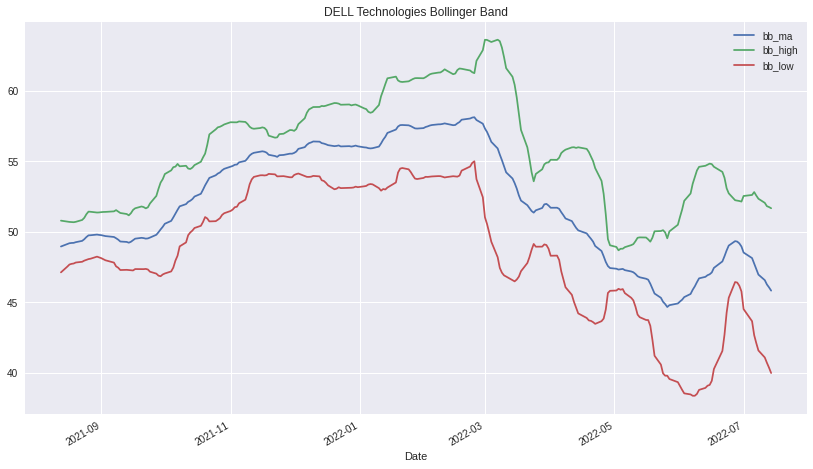

In [5]:
ta_bbands = ta.volatility.BollingerBands(close=df["Adj Close"],window = 20,window_dev = 2)

ta_df = df.copy()

ta_df["bb_ma"] = ta_bbands.bollinger_mavg()
ta_df["bb_high"] = ta_bbands.bollinger_hband()
ta_df["bb_low"] = ta_bbands.bollinger_lband()

ta_df[["bb_ma","bb_high","bb_low"]].plot(title = "DELL Technologies Bollinger Band")

# Stock Signals

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import yfinance as yf

In [7]:
myticker = 'DELL'
mydata = pd.DataFrame()
mydata[myticker] = yf.download(myticker, start="2021-07-19", end="2022-07-15")['Adj Close']
mydata.columns = {'Close Price'}
mydata.head(10)

[*********************100%***********************]  1 of 1 completed


,Close Price
Date,
2021-07-19,46.748055
2021-07-20,48.001316
2021-07-21,48.424099
2021-07-22,48.288204
2021-07-23,48.595226
2021-07-26,48.549927
2021-07-27,48.368736
2021-07-28,48.263039
2021-07-29,48.716022


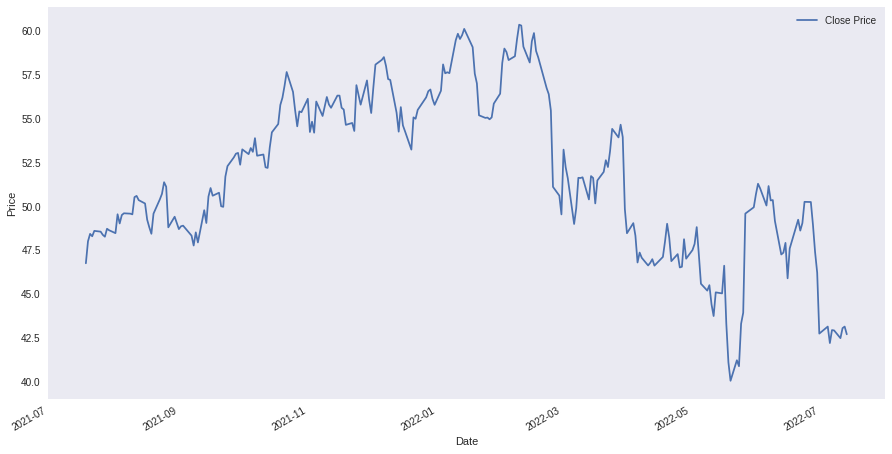

In [8]:
mydata.plot(figsize = (15,8))
plt.grid()
plt.ylabel("Price")
plt.show()

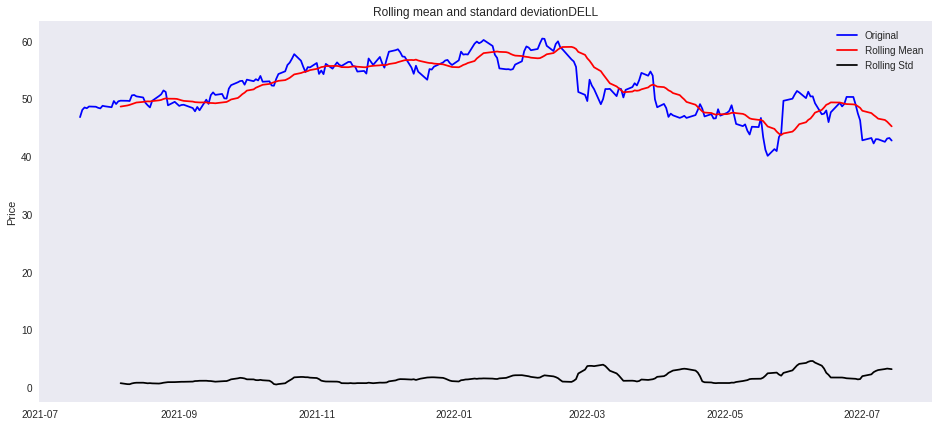

In [9]:
rolling_mean = mydata['Close Price'].rolling(15).mean()
rolling_std = mydata[ 'Close Price' ].rolling(15).std()

plt.figure(figsize = (16, 7))
fig=plt.figure(1)

orig = plt.plot(mydata['Close Price'],color='blue' ,label='Original')
mean = plt.plot (rolling_mean,color='red' , label='Rolling Mean')
std = plt. plot (rolling_std, color='black' ,label= 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation' + myticker)
plt.grid()
plt.ylabel ("Price")
plt. show()

### Simple Moving Average

In [10]:
# create 10 days simple moving average column
mydata['SMA30' ] = mydata['Close Price'].rolling(window = 30, min_periods = 1).mean()
# create 60 days simple moving average column
mydata['SMA90' ] = mydata['Close Price' ].rolling(window = 90, min_periods = 1).mean()
# display first few rows
mydata.head()

,Close Price,SMA30,SMA90
Date,,,
2021-07-19,46.748055,46.748055,46.748055
2021-07-20,48.001316,47.374685,47.374685
2021-07-21,48.424099,47.724490,47.724490
2021-07-22,48.288204,47.865418,47.865418
2021-07-23,48.595226,48.011380,48.011380


In [11]:
mydata['Signal'] = 0.0
mydata['Signal'] = np.where(mydata['SMA30'] > mydata['SMA90'],1.0,0.0)

In [12]:
mydata['Position'] = mydata['Signal'].diff()

mydata.head()

,Close Price,SMA30,SMA90,Signal,Position
Date,,,,,
2021-07-19,46.748055,46.748055,46.748055,0.0,NaN
2021-07-20,48.001316,47.374685,47.374685,0.0,0.0
2021-07-21,48.424099,47.724490,47.724490,0.0,0.0
2021-07-22,48.288204,47.865418,47.865418,0.0,0.0
2021-07-23,48.595226,48.011380,48.011380,0.0,0.0


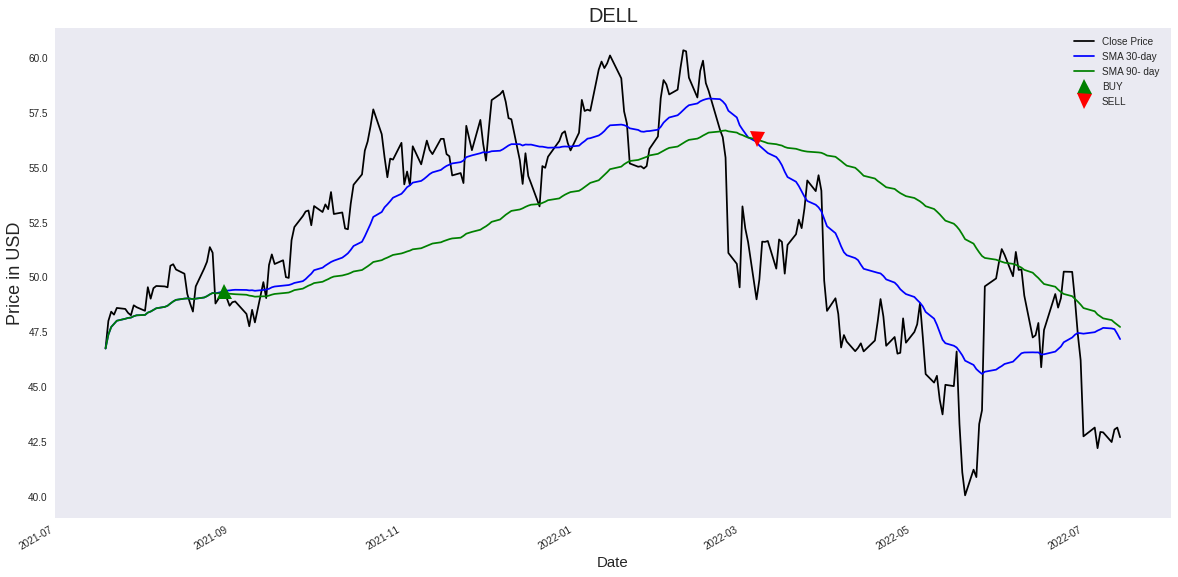

In [13]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages
mydata['Close Price'].plot(color = 'k', label= 'Close Price')
mydata['SMA30' ].plot(color= 'b', label = 'SMA 30-day ')
mydata['SMA90' ].plot(color = 'g', label = 'SMA 90- day ')
# plot 'buy' signals
plt.plot(mydata[mydata['Position'] == 1].index,
         mydata['SMA30' ][mydata['Position'] == 1],
         '^',markersize = 15, color = 'g', label = 'BUY')

# plot 'sell' signals
plt.plot(mydata[mydata['Position']== -1].index, 
         mydata['SMA90'][mydata['Position'] == -1],
         'v', markersize = 15, color = 'r',label='SELL')
                         
plt.ylabel('Price in USD', fontsize = 18)
plt.xlabel('Date', fontsize = 15 )
plt.title(myticker, fontsize = 20)
plt.legend()
plt.grid()
plt. show()


In [14]:
df_position = mydata[ (mydata[ 'Position' ] == 1) | (mydata['Position' ] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x== 1 else 'sell')
print (tabulate(df_position, headers = 'keys', tablefmt ='psql'))

+---------------------+---------------+---------+---------+----------+------------+
| Date                |   Close Price |   SMA30 |   SMA90 |   Signal | Position   |
|---------------------+---------------+---------+---------+----------+------------|
| 2021-08-30 00:00:00 |       49.4005 | 49.3497 | 49.2658 |        1 | Buy        |
| 2022-03-07 00:00:00 |       48.9869 | 56.1705 | 56.2905 |        0 | sell       |
+---------------------+---------------+---------+---------+----------+------------+


### Exponential Moving Average

In [15]:
myticker='DELL'
df=pd.DataFrame()
df[myticker]= yf.download(myticker, start="2021-07-19", end="2022-07-15")['Adj Close']
df.columns={'Close Price'}
df.head(10)

[*********************100%***********************]  1 of 1 completed


,Close Price
Date,
2021-07-19,46.748055
2021-07-20,48.001316
2021-07-21,48.424099
2021-07-22,48.288204
2021-07-23,48.595226
2021-07-26,48.549927
2021-07-27,48.368736
2021-07-28,48.263039
2021-07-29,48.716022


In [16]:
df['EMA30']= df['Close Price'].ewm(span = 30, adjust= False).mean()
df['EMA90'] = df['Close Price'].ewm (span = 90, adjust = False).mean()
df['Signal']=0.0
df['Signal'] = np.where(df['EMA30' ] > df['EMA90'], 1.0, 0.0)
df['Position']= df['Signal'].diff()

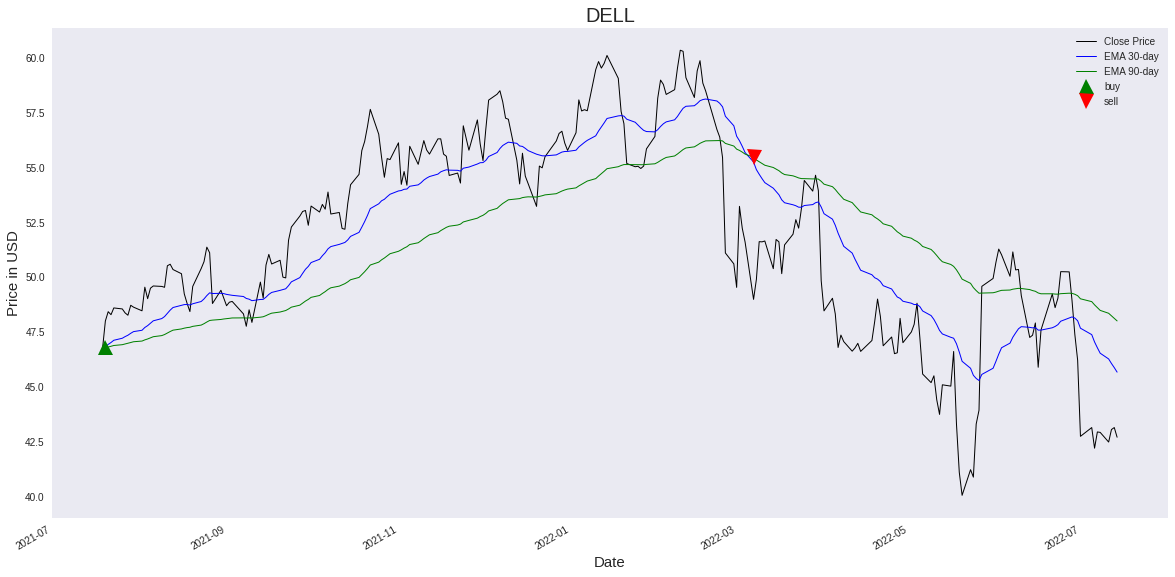

In [17]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages
df['Close Price'].plot(color= 'k',lw=1, label='Close Price')
df['EMA30'].plot(color='b', lw = 1, label='EMA 30-day')
df['EMA90'].plot(color='g',lw = 1, label='EMA 90-day')
# plot "buy* and 'sell' signals
plt.plot(df[df['Position' ] == 1].index,
df['EMA30'][df['Position' ] == 1],
'^',markersize = 15, color = 'g', label='buy')

plt.plot(df[df['Position'] == -1].index,
df['EMA90'][df['Position'] == -1],
'v',markersize = 15, color ='r',label ='sell')


plt.ylabel ('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title(myticker , fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [18]:
df_position = df[ (df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position' ] = df_position['Position' ].apply(lambda x: 'Buy' if x==1 else 'Sell')
print(tabulate(df_position, headers='keys',tablefmt ='psql'))

+---------------------+---------------+---------+---------+----------+------------+
| Date                |   Close Price |   EMA30 |   EMA90 |   Signal | Position   |
|---------------------+---------------+---------+---------+----------+------------|
| 2021-07-20 00:00:00 |       48.0013 | 46.8289 | 46.7756 |        1 | Buy        |
| 2022-03-07 00:00:00 |       48.9869 | 55.2492 | 55.4655 |        0 | Sell       |
+---------------------+---------------+---------+---------+----------+------------+


# Facebook Prophet

In [19]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from fbprophet import Prophet
plt.style.use("fivethirtyeight")
import yfinance as yfin
yfin.pdr_override()

In [20]:
df1 = pdr.get_data_yahoo("DELL", start="2021-07-19", end="2022-07-15")

[*********************100%***********************]  1 of 1 completed


In [21]:
df1 = df1.reset_index()
df1[['ds','y']] = df1[['Date','Close']]


In [22]:
model1= Prophet()

In [23]:
df1.drop(['Date','Close','Open','High','Low','Adj Close','Volume'],axis=1,inplace=True)

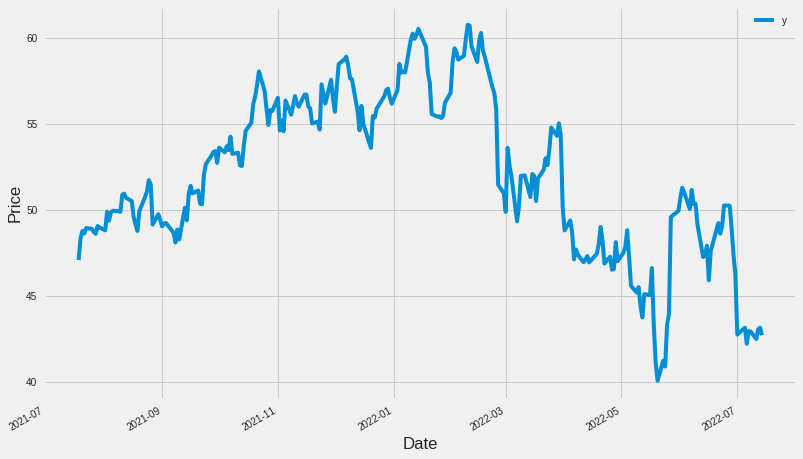

In [24]:
ax = df1.set_index('ds').plot(figsize=(12,8))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.show()

In [25]:
model1.fit(df1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
future1 = model1.make_future_dataframe(periods=365)

In [27]:
predictions1=model1.predict(future1)

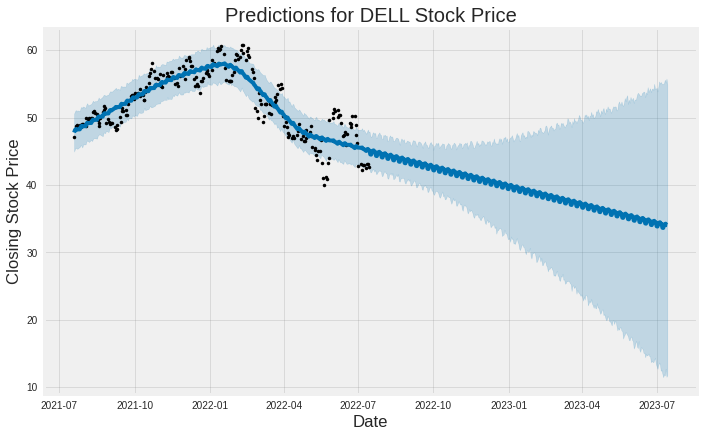

,ds,yhat,yhat_lower,yhat_upper
610,2023-07-10,33.954458,11.919626,55.091814
611,2023-07-11,34.208332,11.764608,55.609794
612,2023-07-12,34.258539,12.753328,55.157601
613,2023-07-13,34.059075,11.554105,55.762688
614,2023-07-14,34.036971,11.845726,54.943353


In [28]:
model1.plot(predictions1)
plt.title("Predictions for DELL Stock Price")
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

predictions1[['ds','yhat','yhat_lower','yhat_upper']].tail()

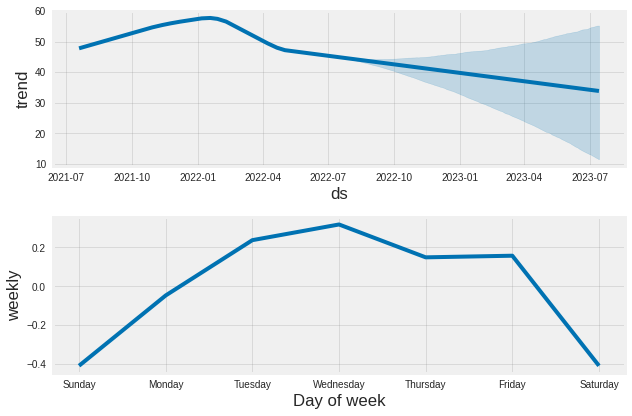

In [29]:
model1.plot_components(predictions1)
plt.show()